# Import Libraries & Read data

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('../data/train.csv', low_memory=False)
test = pd.read_csv('../data/test.csv', low_memory=False)

In [3]:
len(train), len(test)

(100000, 50000)

In [4]:
train.sample(3).T

,13446,11741,44389
ID,0x64c8,0x5acb,0x11a17
Customer_ID,CUS_0xd33,CUS_0x7b66,CUS_0x7dec
Month,July,June,June
Name,Petea,Shaod,Ryanc
Age,40,18,19
SSN,897-09-1805,221-80-6215,871-76-8159
Occupation,Musician,Writer,Journalist
Annual_Income,54167.61,57683.19,72245.76
Monthly_Inhand_Salary,NaN,4729.9325,NaN
Num_Bank_Accounts,8,7,9


# Do more investigations 🔍

```yaml
Dataset:
The dataset includes the following 28 features (columns):
    ID: Represents a unique identification of an entry
    Customer_Id: Represents a unique identification of a person
    Month: Represents the month of the year
    Name: Represents the name of a person
    Age: Represents the age of the person
    SSN: Represents the social security number of a person
    Occupation: Represents the occupation of the person
    Annual_Income: Represents the annual income of the person
    Month_Inhand_Salary: Represents the monthly base salary of a person
    Num_Bank_Accounts : Represents the number of bank accounts a person holds
    Num_Credit_Card : Represents the number of other credit cards held by a person
    Interest_Rate: Represents the interest rate on credit card
    Num_of_loan: Represents the number of loans taken from the bank
    Type_of_loan: Represents the types of loan taken by a person
    Dealy_from_due_date: Represents the average number of days delayed from the payment date
    Num_of_Delayed_payment: Represents the average number of payments delayed by a person
    Change_Credit_Limit: Represents the percentage change in credit card limit
    Num_Credites_Inquiries: Represents the number of credit card inquiries
    Credit_Mix: Represents the classification of the mix of credits
    Outstanding_Debt: Represents the remaining debt to be paid (in USD)
    Credit_Utilization_Ratio: Represents the utilization ratio of credit card
    Credit_History_Age : Represents the age of credit history of the person
    Payment_of_Min_Amount : represents whether only the minimum amount was paid by the person
    Total_EMI_per_month: Represents the monthly EMI payments (in USD)
    Amount_Invested_Monthly: Represents the monthly amount invested by the customer (in USD)
    Payment_Behavior: Represents the payment behavior of the customer (in USD)
    Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
    Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)
```

In [5]:
df = train.copy()
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.describe(include="O")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


<Axes: >

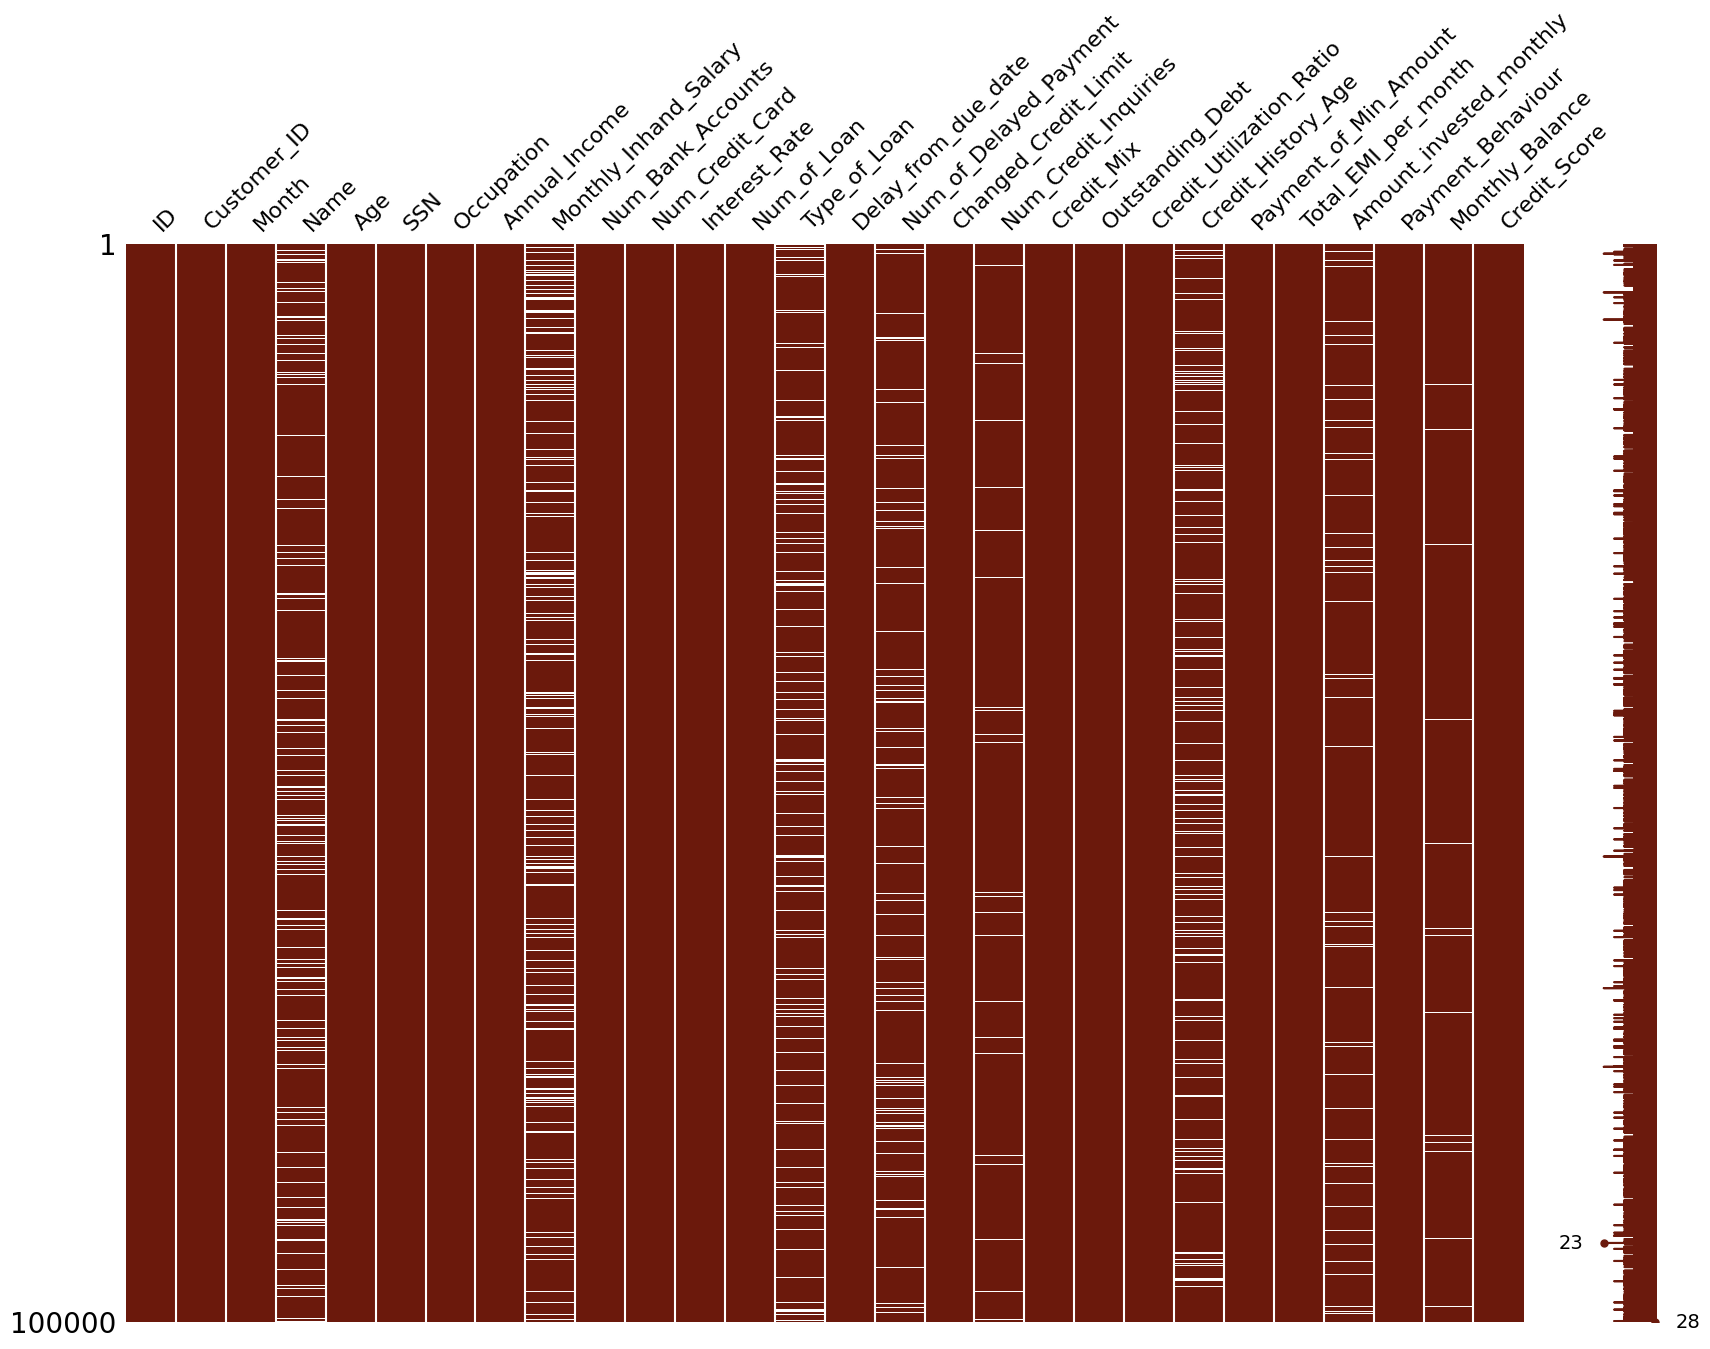

In [8]:
msno.matrix(df=df, figsize=(20, 14), color=(0.42, 0.1, 0.05))

### Key Observations:
* From `describe(include="O")` (Categorical Features)
    1. **High Cardinality:**
        * `ID` and `Customer_ID` are unique or nearly unique.
        * `Name` has 10,139 unique values, indicating significant variability.
        * `Type_of_Loan` has 6,260 unique patterns.
    3. **Common Placeholder/Noise Values:**
        * `Occupation`: The top value is `_______`, appearing 7,062 times.
        * `SSN`: Contains invalid entries like `#F%$D@*&8` appearing 5,572 times.
        * `Payment_Behaviour`: Includes noisy patterns such as `Low_spent_Small_value_payments` and placeholders.
    4. **Imbalanced Categories:**
        * `Credit_Mix` is dominated by `Standard` (36,479 occurrences).
        * `Payment_of_Min_Amount`: The top value is `Yes`, appearing 52,326 times, indicating imbalance.
    5. **Type_of_Loan Variability:**
        * Many unique combinations suggest the need for better standardization and splitting.
    6. **Outliers in `Monthly_Balance`:**
        * Contains extreme placeholder values like `__-333333333333333333333333333__`.

In [9]:
df.describe(exclude="O")

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### Key Observations:
* From `describe(exclude="O")` (Numeric Features)
    1. **Extreme Values and Outliers:**
       * `Num_Bank_Accounts` and `Num_Credit_Card` have unrealistic max values (`1798` and `1499`, respectively).
       * `Interest_Rate` ranges up to `5797`, which is highly abnormal.
       * `Total_EMI_per_month` has a max of `82,331`, far above the typical range.
    3. **Negative and Zero Values:**
       * `Num_Bank_Accounts` and `Delay_from_due_date` have negative values, which are not meaningful.
       * `Monthly_Inhand_Salary` and `Total_EMI_per_month` have zeros, which might indicate missing or invalid data.
    5. **Skewed Distributions:**
       * Many numeric features (e.g., `Num_Bank_Accounts`, `Interest_Rate`) have mean and median far apart, indicating skewness.

### Convert Numeric Columns Stored as object

In [10]:
numeric_cols = [
    "Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", 
    "Monthly_Balance"
]

def remove_underscore(sample: str) -> float:
    """Function to convert the string number into float, after removing the underscore."""
    if pd.notnull(sample):
        return pd.to_numeric(str(sample).strip("_")[:20])
    return np.nan

for col in numeric_cols:
    df[col] = df[col].apply(remove_underscore)

# Data Analysis 📊
## Univariate Analysis

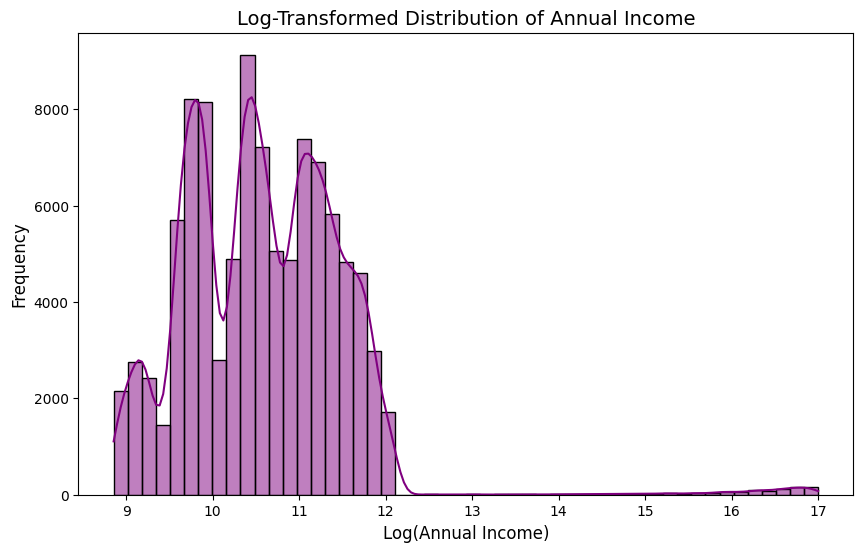

In [11]:
# Log transformation of Annual Income to reduce skewness
df['Log_Annual_Income'] = np.log1p(df['Annual_Income'])

# Plotting the log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Annual_Income'], kde=True, color='purple', bins=50)
plt.title("Log-Transformed Distribution of Annual Income", fontsize=14)
plt.xlabel("Log(Annual Income)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

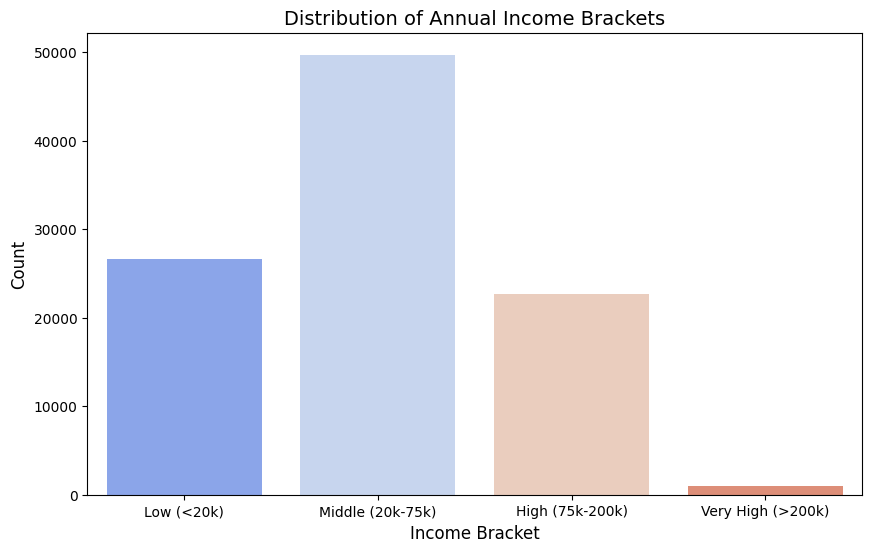

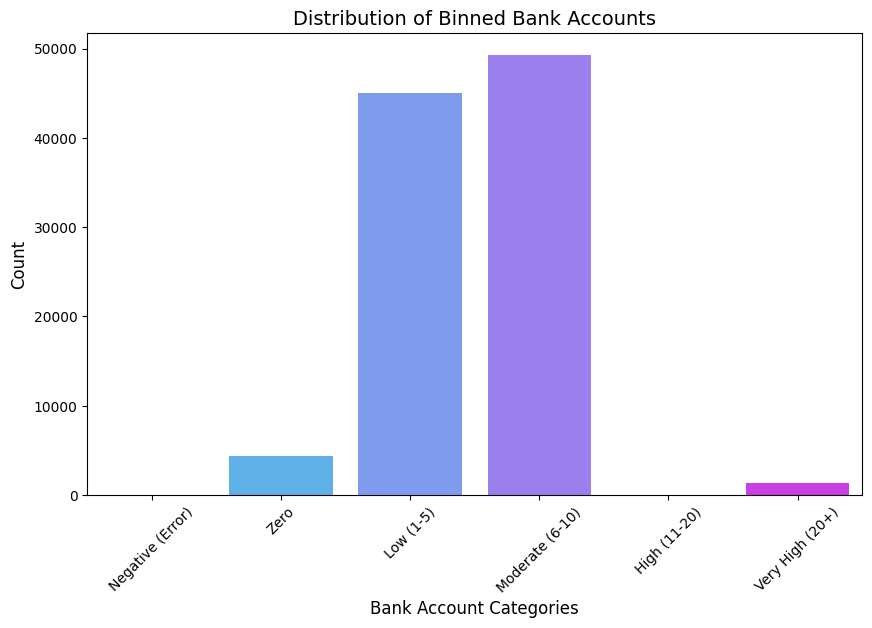

In [12]:
# Define income brackets
bins = [-float('inf'), 20000, 75000, 200000, float('inf')]
labels = ['Low (<20k)', 'Middle (20k-75k)', 'High (75k-200k)', 'Very High (>200k)']

df['Income_Bracket'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Bracket', data=df, palette='coolwarm')
plt.title("Distribution of Annual Income Brackets", fontsize=14)
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


bins = [-float('inf'), -1, 0, 5, 10, 20, float('inf')]
labels = ['Negative (Error)', 'Zero', 'Low (1-5)', 'Moderate (6-10)', 'High (11-20)', 'Very High (20+)']

df['Bank_Accounts_Binned'] = pd.cut(df['Num_Bank_Accounts'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='Bank_Accounts_Binned', data=df, palette='cool')
plt.title("Distribution of Binned Bank Accounts", fontsize=14)
plt.xlabel("Bank Account Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


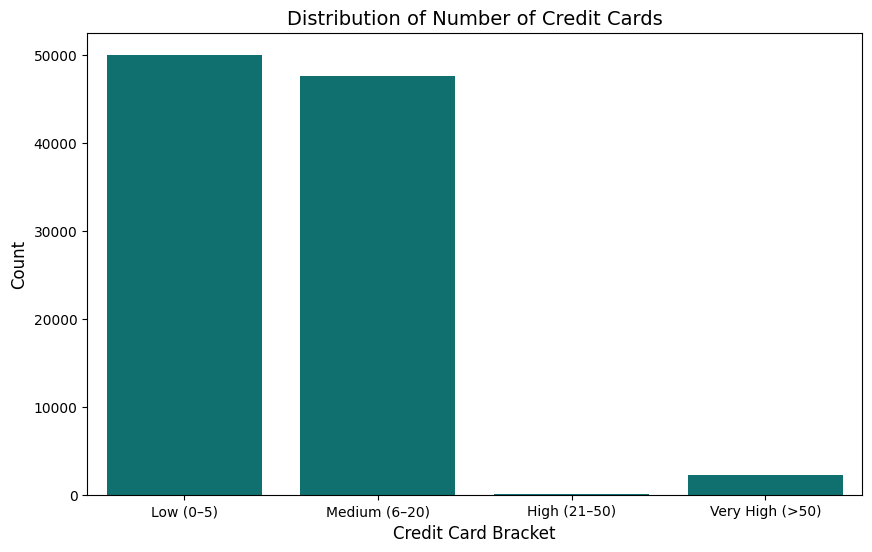

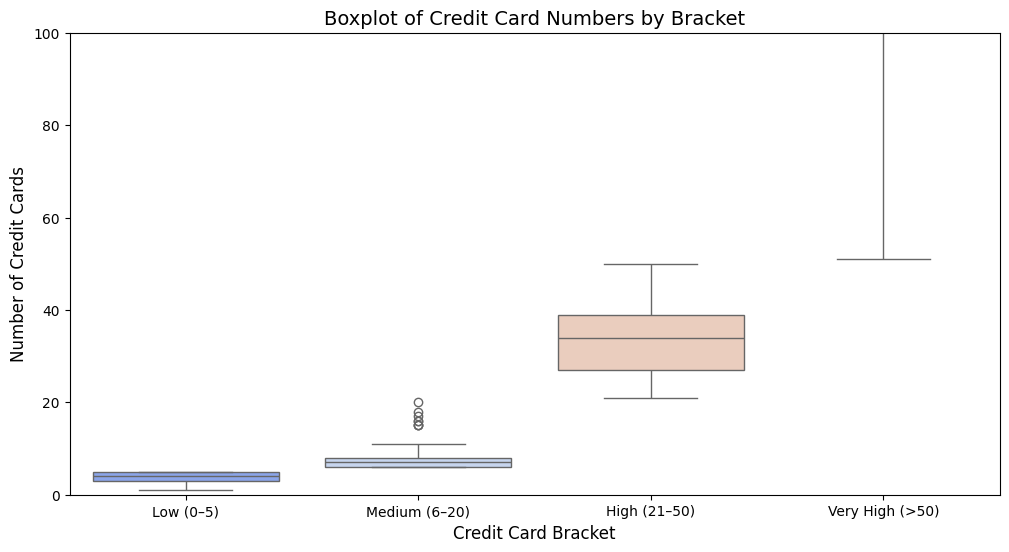

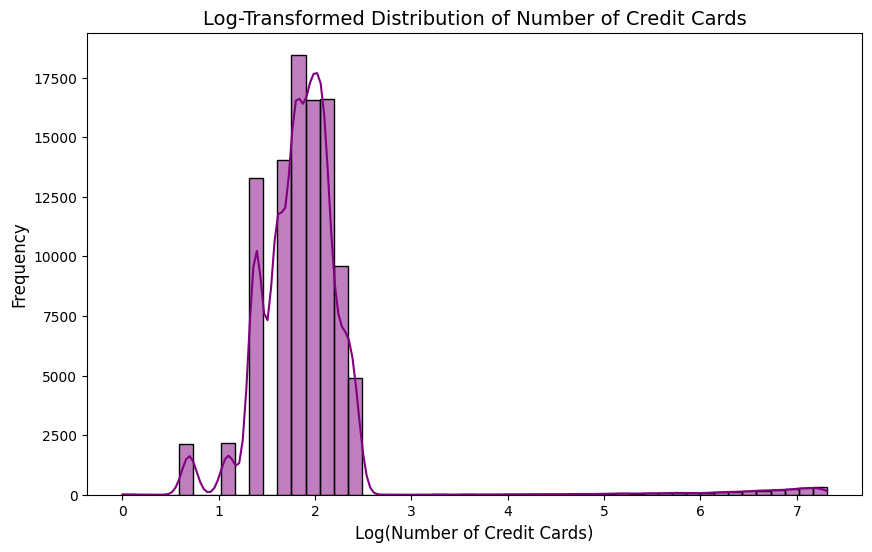

In [13]:
# Credit Card Count
## 1- Clustering and Count Plot
bins = [0, 5, 20, 50, float('inf')]
labels = ['Low (0–5)', 'Medium (6–20)', 'High (21–50)', 'Very High (>50)']

df['Credit_Card_Bracket'] = pd.cut(df['Num_Credit_Card'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_Card_Bracket', color='teal')
plt.title("Distribution of Number of Credit Cards", fontsize=14)
plt.xlabel("Credit Card Bracket", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

##2- Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Credit_Card_Bracket', y='Num_Credit_Card', palette='coolwarm')
plt.title("Boxplot of Credit Card Numbers by Bracket", fontsize=14)
plt.xlabel("Credit Card Bracket", fontsize=12)
plt.ylabel("Number of Credit Cards", fontsize=12)
plt.ylim(0, 100)
plt.show()

##3- Histogram (Log Transformation)
# Apply log transformation
df['Log_Num_Credit_Card'] = np.log1p(df['Num_Credit_Card'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Num_Credit_Card'], bins=50, kde=True, color='purple')
plt.title("Log-Transformed Distribution of Number of Credit Cards", fontsize=14)
plt.xlabel("Log(Number of Credit Cards)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


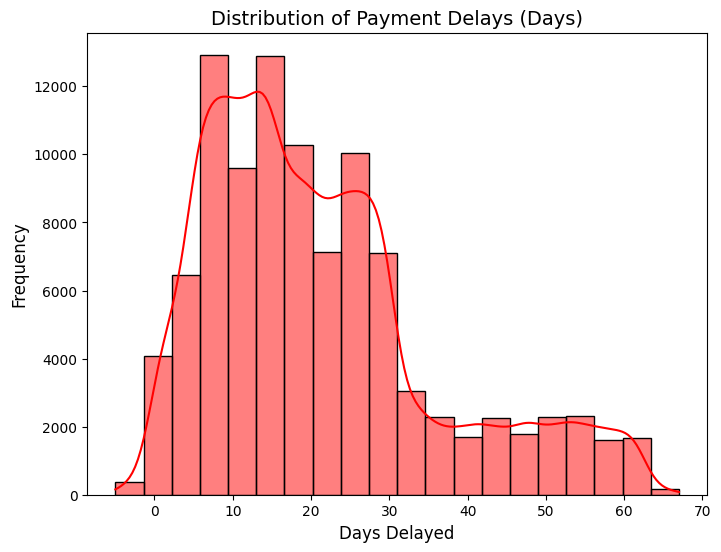

In [14]:
#  Delay from Due Dateabs
plt.figure(figsize=(8, 6))
sns.histplot(df["Delay_from_due_date"], bins=20, kde=True, color="red")
plt.title("Distribution of Payment Delays (Days)", fontsize=14)
plt.xlabel("Days Delayed", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


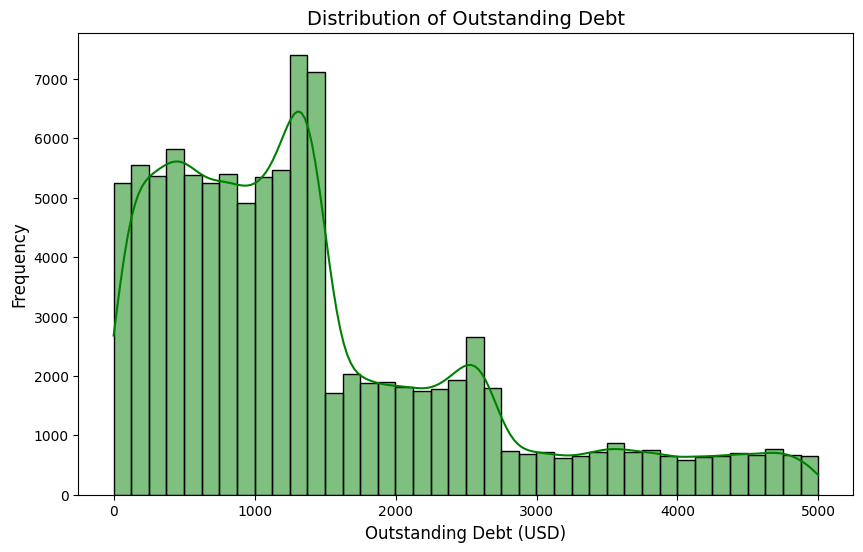

In [15]:
# Outstanding Debt
plt.figure(figsize=(10, 6))
sns.histplot(df["Outstanding_Debt"], kde=True, color="green", bins=40)
plt.title("Distribution of Outstanding Debt", fontsize=14)
plt.xlabel("Outstanding Debt (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


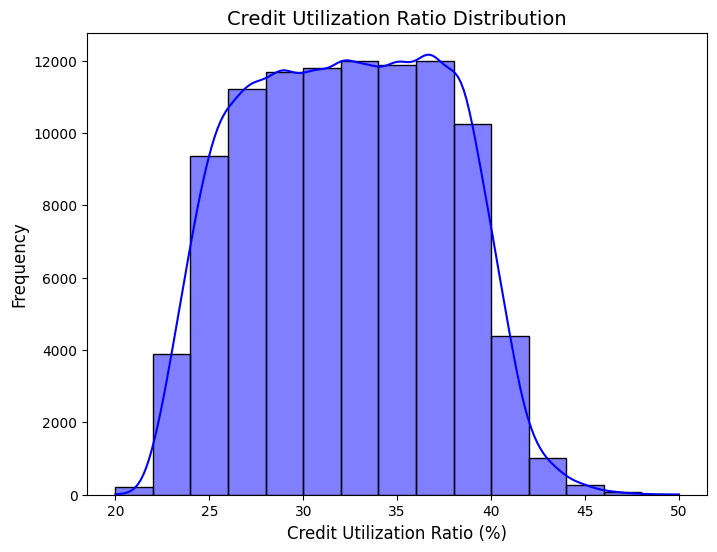

In [16]:
# Credit Utilization Ratio
plt.figure(figsize=(8, 6))
sns.histplot(df["Credit_Utilization_Ratio"], bins=15, kde=True, color="blue")
plt.title("Credit Utilization Ratio Distribution", fontsize=14)
plt.xlabel("Credit Utilization Ratio (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


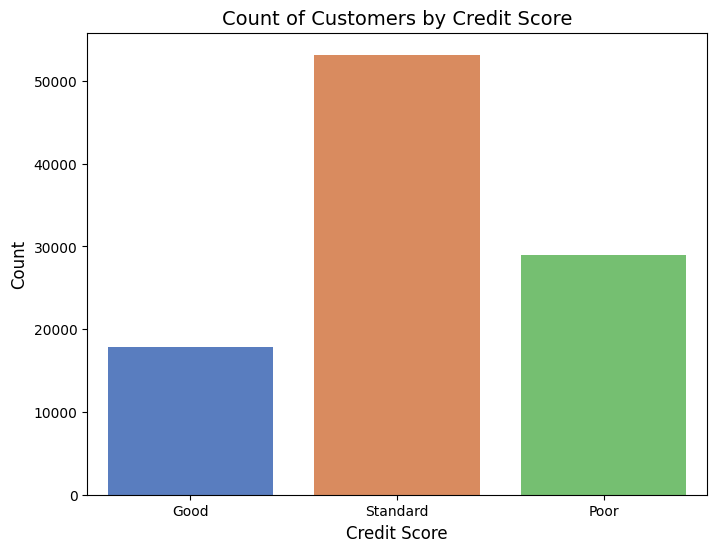

In [17]:
# Count of `Credit Score` Categories
plt.figure(figsize=(8, 6))
sns.countplot(x="Credit_Score", data=df, palette="muted")
plt.title("Count of Customers by Credit Score", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


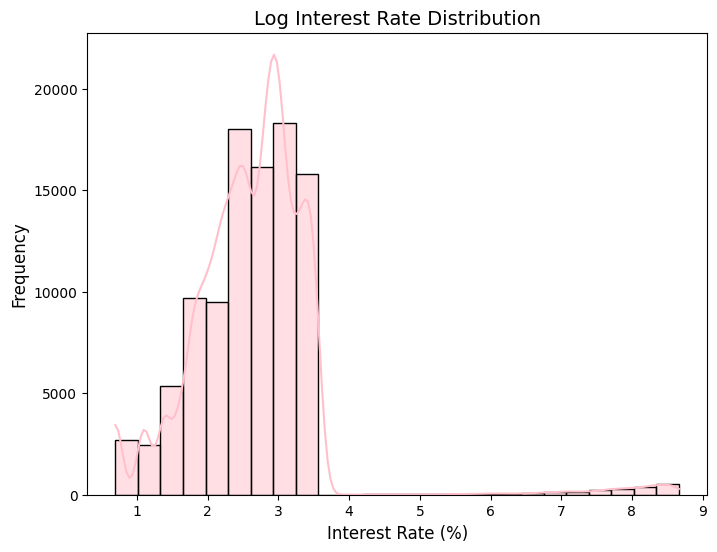

In [18]:
# Interest Rate
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(df["Interest_Rate"]), kde=True, bins=25, color="pink")
plt.title("Log Interest Rate Distribution", fontsize=14)
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


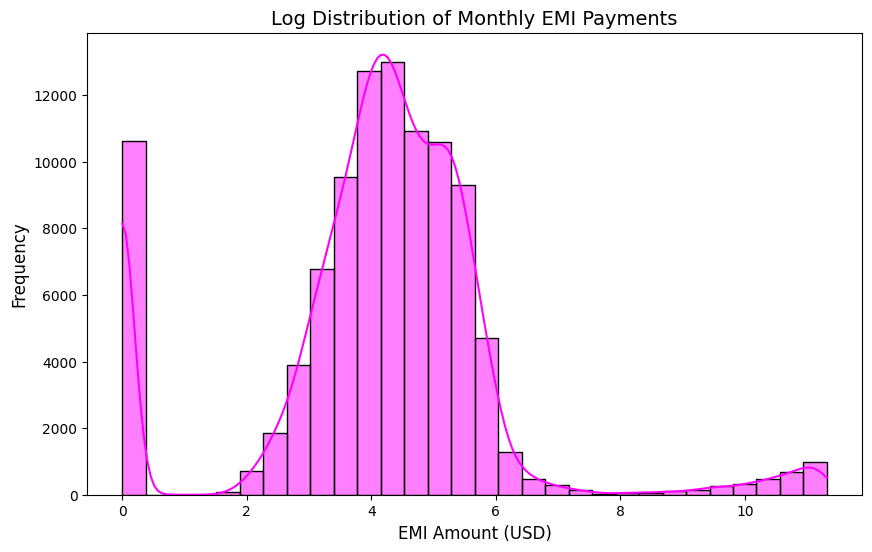

In [19]:
# Total EMI Per Month
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df["Total_EMI_per_month"]), kde=True, color="magenta", bins=30)
plt.title("Log Distribution of Monthly EMI Payments", fontsize=14)
plt.xlabel("EMI Amount (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


## Multivariate Analysis

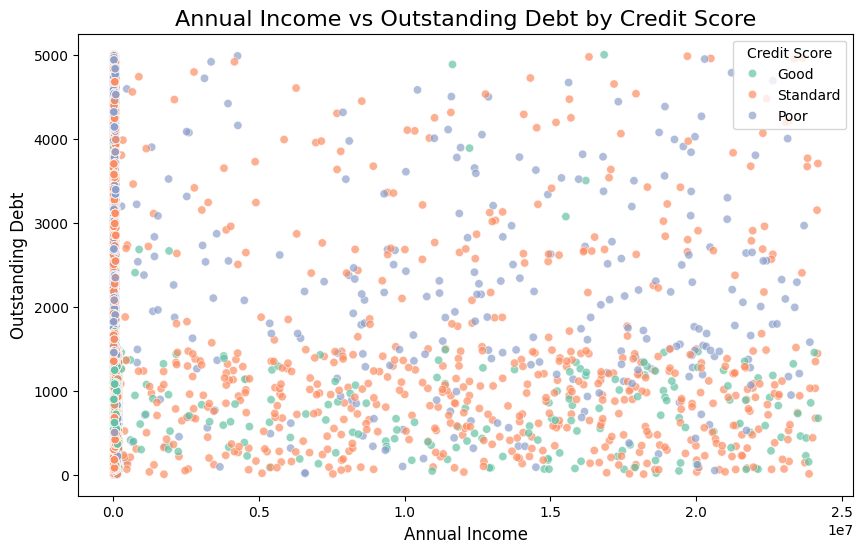

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Annual_Income",
    y="Outstanding_Debt",
    hue="Credit_Score",
    data=df,
    palette="Set2",
    alpha=0.7
)
plt.title("Annual Income vs Outstanding Debt by Credit Score", fontsize=16)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Outstanding Debt", fontsize=12)
plt.legend(title="Credit Score")
plt.show()


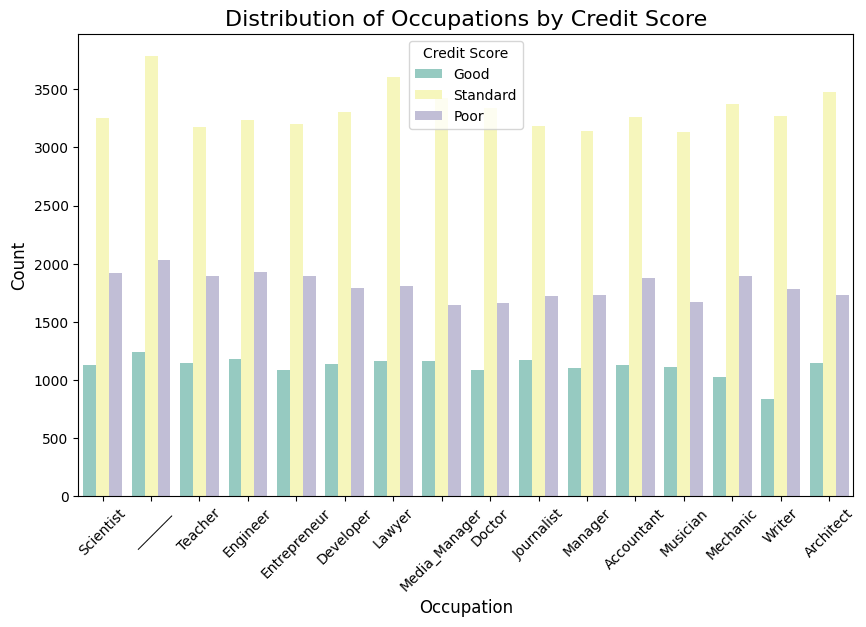

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Occupation", hue="Credit_Score", data=df, palette="Set3")
plt.title("Distribution of Occupations by Credit Score", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Credit Score")
plt.show()


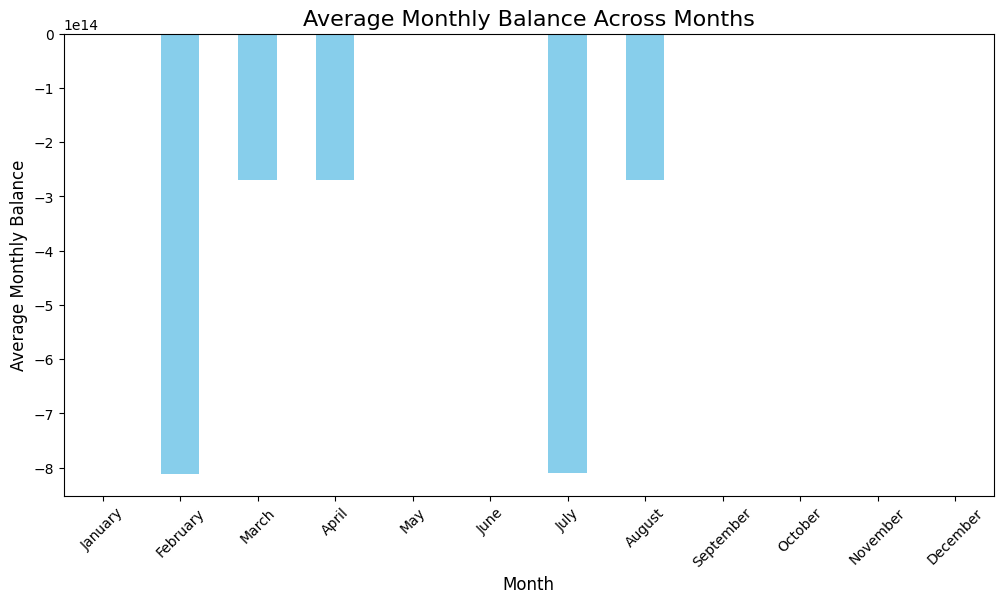

In [22]:
monthly_avg_balance = df.groupby("Month")["Monthly_Balance"].mean().reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])

plt.figure(figsize=(12, 6))
monthly_avg_balance.plot(kind="bar", color="skyblue")
plt.title("Average Monthly Balance Across Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Monthly Balance", fontsize=12)
plt.xticks(rotation=45)
plt.show()

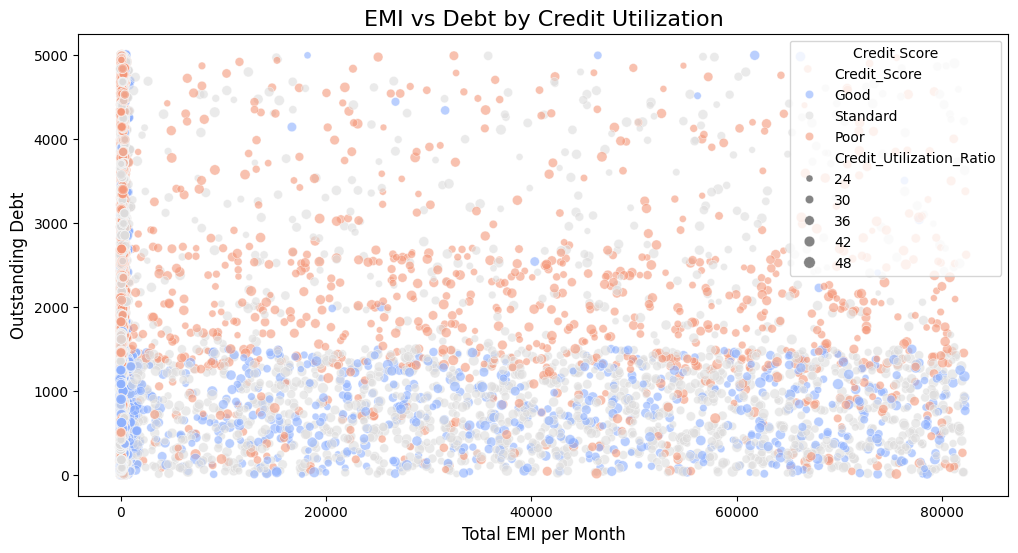

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Total_EMI_per_month",
    y="Outstanding_Debt",
    size="Credit_Utilization_Ratio",
    hue="Credit_Score",
    data=df,
    alpha=0.6,
    palette="coolwarm"
)
plt.title("EMI vs Debt by Credit Utilization", fontsize=16)
plt.xlabel("Total EMI per Month", fontsize=12)
plt.ylabel("Outstanding Debt", fontsize=12)
plt.legend(title="Credit Score")
plt.show()


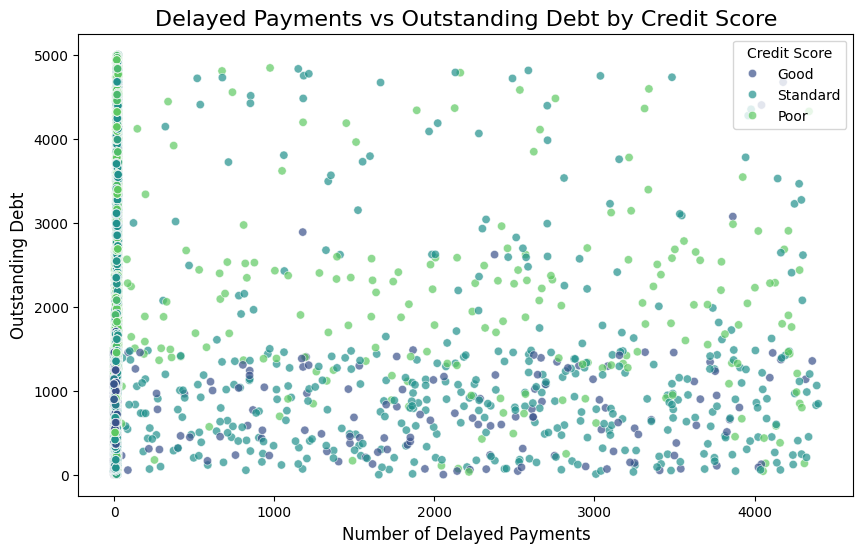

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Num_of_Delayed_Payment",
    y="Outstanding_Debt",
    hue="Credit_Score",
    data=df,
    palette="viridis",
    alpha=0.7
)
plt.title("Delayed Payments vs Outstanding Debt by Credit Score", fontsize=16)
plt.xlabel("Number of Delayed Payments", fontsize=12)
plt.ylabel("Outstanding Debt", fontsize=12)
plt.legend(title="Credit Score")
plt.show()


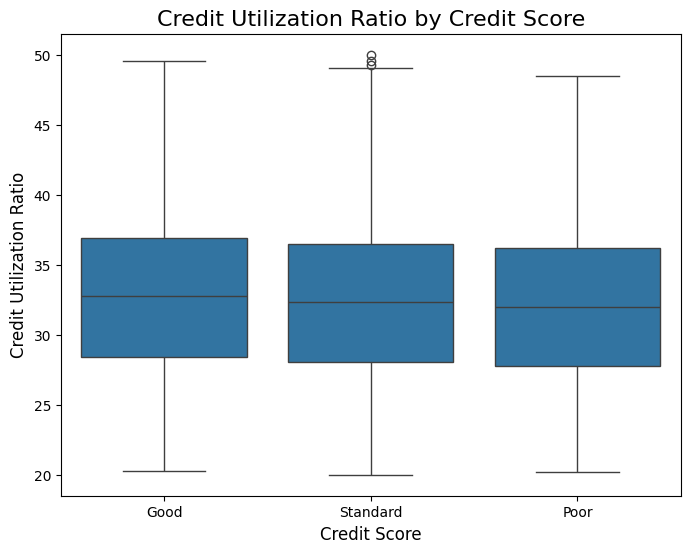

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Credit_Score", y="Credit_Utilization_Ratio", data=df)
plt.title("Credit Utilization Ratio by Credit Score", fontsize=16)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Credit Utilization Ratio", fontsize=12)
plt.show()

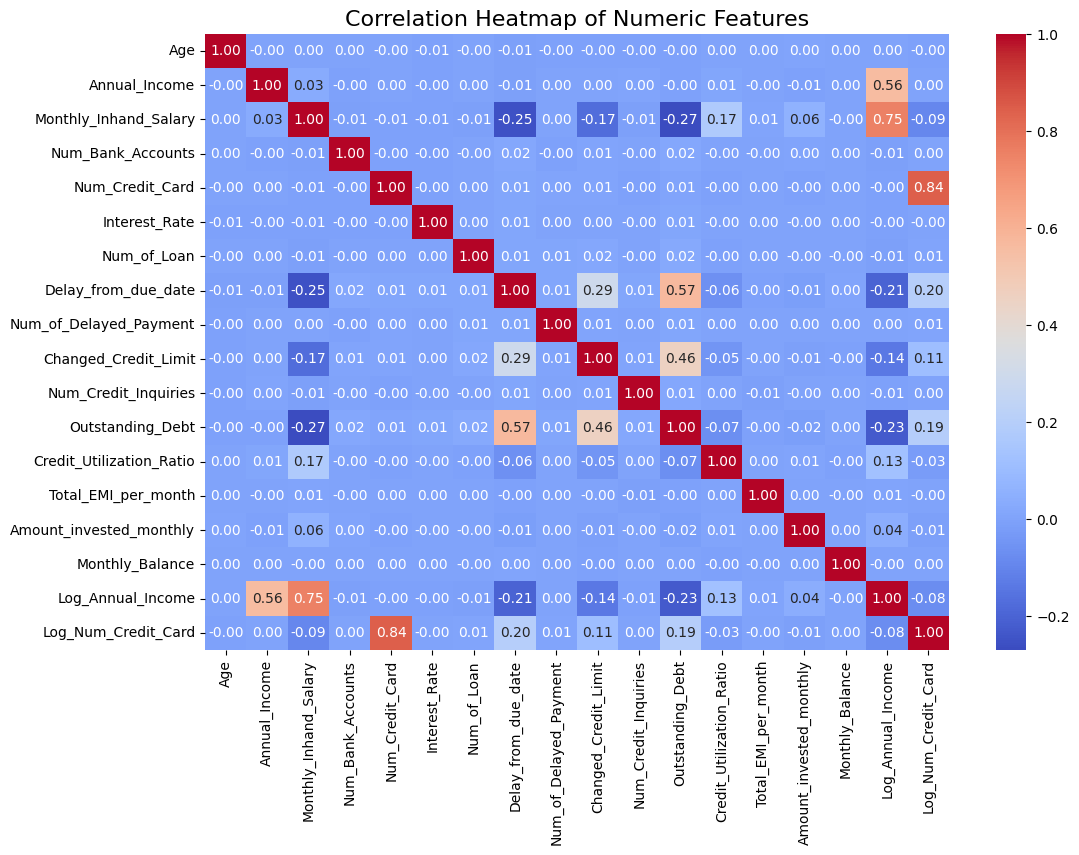

In [26]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

___

# Pre-processing step & Feature Engineering

In [27]:
df = train.copy()

### Handle Numeric Columns Stored as object 

In [28]:
def remove_underscore(sample: str) -> float:
    """
    Function to convert the string number into a float, 
    after removing the underscore characters.
    """
    if pd.notnull(sample):
        return pd.to_numeric(str(sample).replace("_", "")[:20])
    return np.nan

class RemoveUnderscore(BaseEstimator, TransformerMixin):
    """
    Transformer to remove underscores from numeric columns 
    and convert them to float values.
    """

    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.select_dtypes(include=["object", "string"]).columns
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].apply(remove_underscore)
        return X


### Handle Outliers values.

In [29]:
class ClipOutliers(BaseEstimator, TransformerMixin):
    """Transformer to clip outliers for numeric columns."""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X[col] = np.clip(X[col], lower_bound, upper_bound)
        return X

### Dealing with `Credit_History_Age` column

In [30]:
def extract_Credit_History_Age(value):
    if isinstance(value, str):
        return int(value.split(" ")[0])

### Frequency encoding categorical columns

In [31]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """Transformer for frequency encoding categorical columns with distribution-preserving NaN imputation."""

    def __init__(self, columns):
        self.columns = columns
        self.freq_maps = {}

    def fit(self, X, y=None):
        for col in self.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True).to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            # Fill NaN values by sampling based on the original distribution
            value_counts = X[col].value_counts(normalize=True)
            distribution = value_counts.to_dict()
            fill_values = np.random.choice(
                list(distribution.keys()),
                size=X[col].isna().sum(),
                p=list(distribution.values())
            )
            X.loc[X[col].isna(), col] = fill_values
            X[col] = X[col].map(self.freq_maps[col])
        return X

### Prepare our Pipeline

In [32]:
numeric_pipeline = Pipeline(steps=[
    ('remove_underscore', RemoveUnderscore(numeric_cols)),
    ('clip_outliers', ClipOutliers()),
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
])

In [33]:
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder()),
])

### Let's fire our process

1. Split the dataset into features and targe
2. Apply the `remove_underscore` function to numeric columns
3. Clip outliers in numeric columns
4. Replaces categories with their frequency counts
    1. Frequency encode the `Type_of_Loan` column
    2. Frequency encode the `Occupation` column
    3. Frequency encode the `Payment_Behaviour` column
5. Drop irrelevant columns
6. Preprocess the data

In [34]:
irrelevant_cols = ["ID", "Customer_ID", "SSN", "Name", "Month"]
numeric_cols = [
        "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
        "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",
        "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt",
        "Credit_History_Age", "Credit_Utilization_Ratio", "Total_EMI_per_month",
        "Amount_invested_monthly", "Monthly_Balance"
    ]
low_cardinality_cols = ["Credit_Mix", "Payment_of_Min_Amount"]

high_cardinality_cols = ["Type_of_Loan", "Occupation", "Payment_Behaviour", "Num_Credit_Inquiries"]

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('low_card_cat', categorical_pipeline, low_cardinality_cols),
    ],
    remainder='passthrough',
)

In [36]:
def preprocess_data(df):
    """Preprocess the dataset with all steps combined."""

    df.drop(columns=irrelevant_cols, inplace=True)

    freq_encoder = FrequencyEncoder(columns=high_cardinality_cols)
    df = freq_encoder.fit_transform(df)

    df["Credit_History_Age"] = df.Credit_History_Age.apply(extract_Credit_History_Age)

    X, y = df.drop("Credit_Score", axis=1), df['Credit_Score']
    
    X_preprocessed = preprocessor.fit_transform(X)

    return X_preprocessed, y

In [37]:
df = train.copy()

features, target = preprocess_data(df)

In [38]:
credit_score_mapping = {"Standard": 0, "Poor": 1, "Good": 2}
target = target.map(credit_score_mapping)

____

# Modeling step

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

### Cross-Validation

In [41]:
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy',verbose=1)
    cv_results[name] = scores.mean()
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression: Mean Accuracy: 0.6288


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest: Mean Accuracy: 0.7687


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Gradient Boosting: Mean Accuracy: 0.7025
XGBoost: Mean Accuracy: 0.7420


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


### Hyperparameter Tuning with Grid Search for the best model
#### Random Forest Fine-Tuning

In [42]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [2]:
best_rf = grid_search_rf.best_estimator_

NameError: name 'grid_search_rf' is not defined

#### Gradient Boosting Fine-Tuning

In [ ]:
gb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

gb_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Gradient Boosting parameters:", gb_grid_search.best_params_)
best_gb = gb_grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


#### XGBoost Fine-Tuning

In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.2],
    'max_depth': [5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Grid search for XGBoost
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

xgb_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best XGBoost parameters:", xgb_grid_search.best_params_)
best_xgb = xgb_grid_search.best_estimator_


#### Evaluate the Tuned Models

In [1]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))

print("Random Forest:")
evaluate_model(best_rf, X_test, y_test)

print("Gradient Boosting:")
evaluate_model(best_gb, X_test, y_test)

print("XGBoost:")
evaluate_model(best_xgb, X_test, y_test)


Random Forest:


NameError: name 'best_rf' is not defined